In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

vehicle_df=pd.read_csv("vehicle.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0  compactness         48.0                  83.0         178.0   
1  compactness         41.0                  84.0         141.0   
2  compactness         50.0                 106.0         209.0   
3  compactness         41.0                  82.0         159.0   
4  compactness         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [81]:
vehicle_df.info()
vehicle_df.shape

# There are 846 rows totally and some columns are missing some values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null object
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio   

(846, 19)

In [82]:
print(vehicle_df.isnull().sum())
# Since the number of null values is very less, its better to remove them

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [83]:
vehicle_df.dropna(axis=0,inplace=True)
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null object
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio   

In [84]:
vehicle_df.describe().T

# As seen below, the mean and maximum values of some variables have a big difference 
# That denotes a possiblity of outliers in those variables

count        mean         std    min    25%  \
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [85]:
vehicle_df=vehicle_df.drop(vehicle_df['compactness'],axis=1)

# Dropping Compactness column as all the records have same value

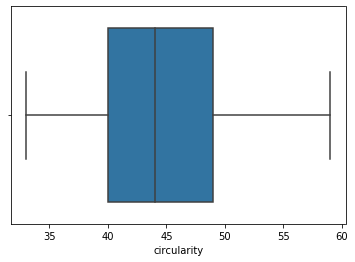

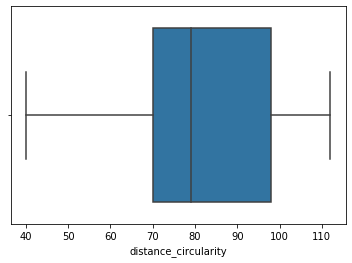

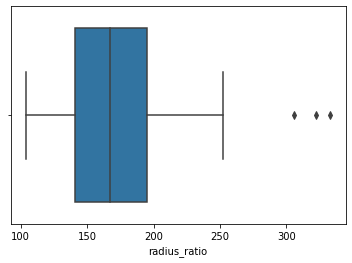

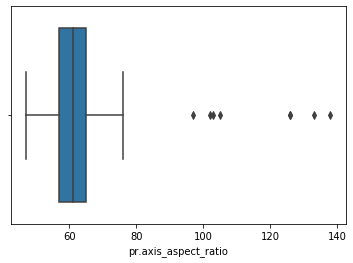

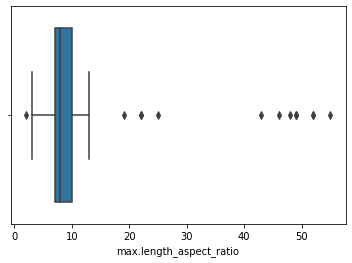

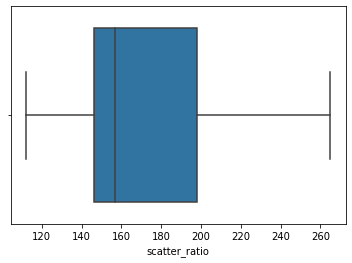

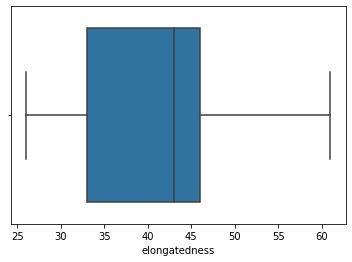

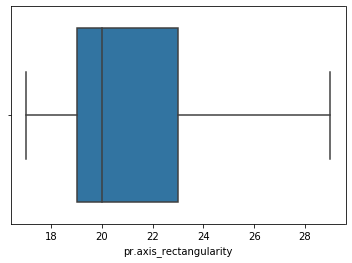

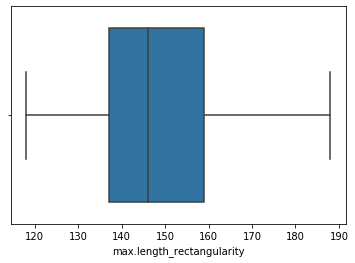

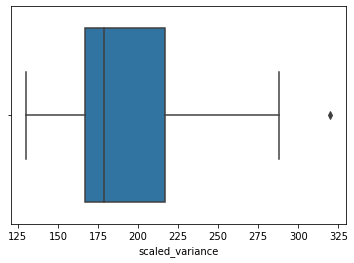

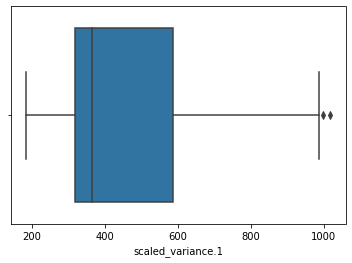

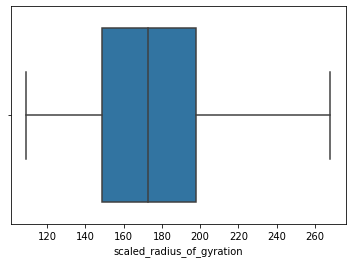

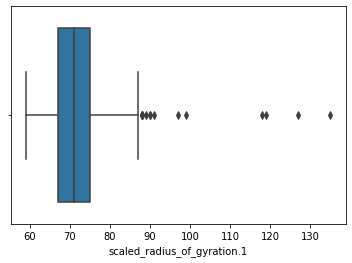

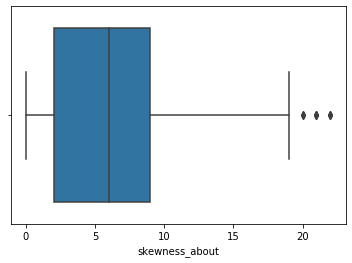

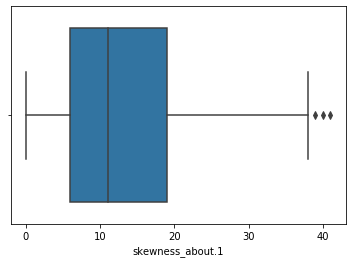

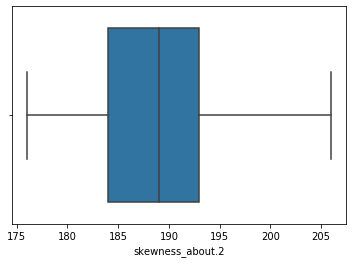

In [86]:
# Outliers plot

columns = vehicle_df.columns
for i,column in enumerate(columns[0:-2]):
    plt.figure(i)
    sns.boxplot(vehicle_df[column])

In [87]:
# Method to remove outliers
def removeOutliers(column,df):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    df=df[df[column]<(q3+(1.5*iqr))]
    df=df[df[column]>(q1-(1.5*iqr))]
    return df

In [88]:
vehicle_df=removeOutliers("radius_ratio",vehicle_df)
vehicle_df=removeOutliers("pr.axis_aspect_ratio",vehicle_df)
vehicle_df=removeOutliers("max.length_aspect_ratio",vehicle_df)
vehicle_df=removeOutliers("scaled_variance",vehicle_df)
vehicle_df=removeOutliers("scaled_variance.1",vehicle_df)
vehicle_df=removeOutliers("scaled_radius_of_gyration",vehicle_df)
vehicle_df=removeOutliers("scaled_radius_of_gyration.1",vehicle_df)
vehicle_df=removeOutliers("skewness_about",vehicle_df)
vehicle_df=removeOutliers("skewness_about.1",vehicle_df)

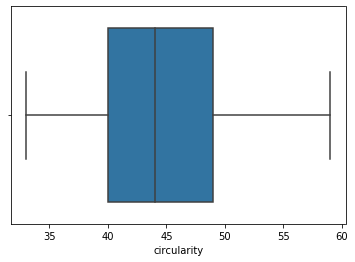

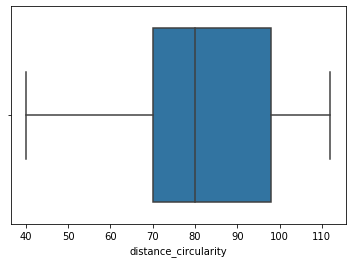

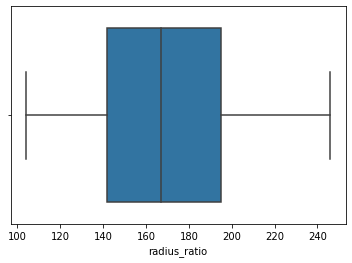

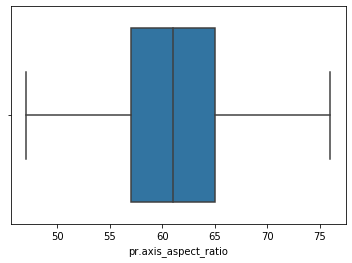

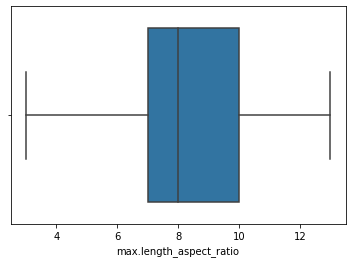

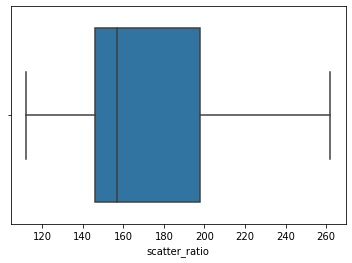

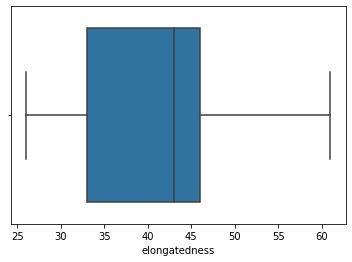

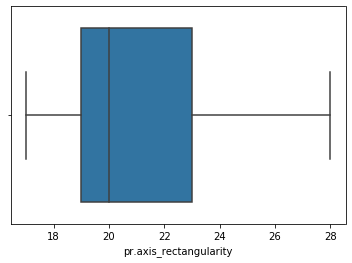

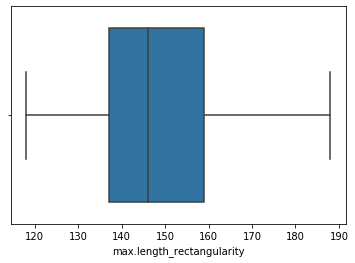

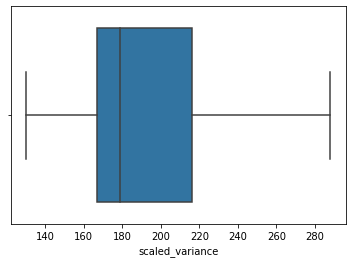

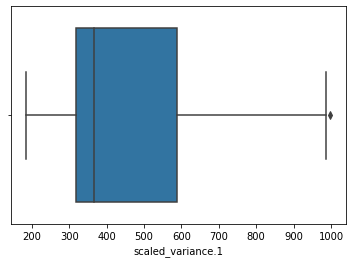

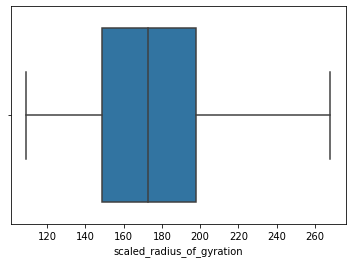

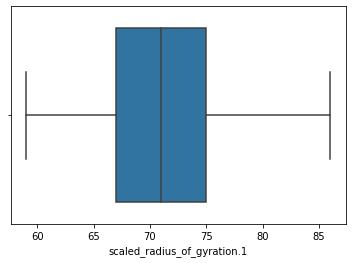

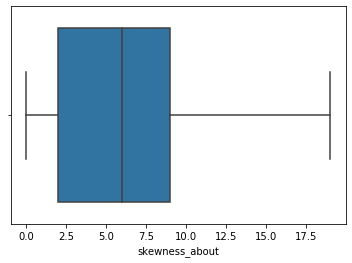

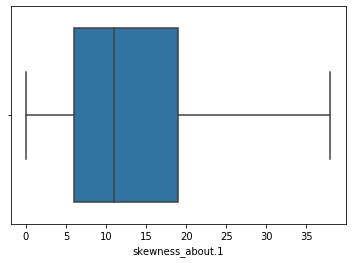

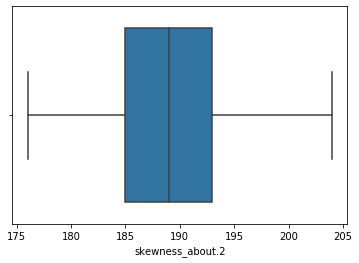

In [89]:
# Box plots after removing the outliers
columns = vehicle_df.columns
for i,column in enumerate(columns[0:-2]):
    plt.figure(i)
    sns.boxplot(vehicle_df[column])

In [90]:
vehicle_df.describe().T

count        mean         std    min    25%  \
circularity                  769.0   44.853056    6.147323   33.0   40.0   
distance_circularity         769.0   82.392718   15.452692   40.0   70.0   
radius_ratio                 769.0  168.681404   31.456131  104.0  142.0   
pr.axis_aspect_ratio         769.0   61.335501    5.654718   47.0   57.0   
max.length_aspect_ratio      769.0    8.163849    2.042311    3.0    7.0   
scatter_ratio                769.0  168.985696   32.818726  112.0  146.0   
elongatedness                769.0   40.833550    7.709293   26.0   33.0   
pr.axis_rectangularity       769.0   20.587776    2.552655   17.0   19.0   
max.length_rectangularity    769.0  148.014304   14.490696  118.0  137.0   
scaled_variance              769.0  188.118336   30.183385  130.0  167.0   
scaled_variance.1            769.0  440.473342  173.852082  184.0  318.0   
scaled_radius_of_gyration    769.0  174.239272   32.364662  109.0  149.0   
scaled_radius_of_gyration.1  769.0   71.777633    5.939032   59.0   67.0   
skewness_about               769.0    6.209363    4.635587    0.0    2.0   
skewness_about.1             769.0   12.716515    8.825434    0.0    6.0   
skewness_about.2             769.0  189.163849    6.034553  176.0  185.0   
hollows_ratio                769.0  195.932380    7.184917  182.0  191.0   

                               50%    75%    max  
circularity                   44.0   49.0   59.0  
distance_circularity          80.0   98.0  112.0  
radius_ratio                 167.0  195.0  246.0  
pr.axis_aspect_ratio          61.0   65.0   76.0  
max.length_aspect_ratio        8.0   10.0   13.0  
scatter_ratio                157.0  198.0  262.0  
elongatedness                 43.0   46.0   61.0  
pr.axis_rectangularity        20.0   23.0   28.0  
max.length_rectangularity    146.0  159.0  188.0  
scaled_variance              179.0  216.0  288.0  
scaled_variance.1            367.0  587.0  998.0  
scaled_radius_of_gyration    173.0  198.0  268.0  
scaled_radius_of_gyration.1   71.0   75.0   86.0  
skewness_about                 6.0    9.0   19.0  
skewness_about.1              11.0   19.0   38.0  
skewness_about.2             189.0  193.0  204.0  
hollows_ratio                197.0  201.0  211.0

In [91]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 845
Data columns (total 18 columns):
circularity                    769 non-null float64
distance_circularity           769 non-null float64
radius_ratio                   769 non-null float64
pr.axis_aspect_ratio           769 non-null float64
max.length_aspect_ratio        769 non-null int64
scatter_ratio                  769 non-null float64
elongatedness                  769 non-null float64
pr.axis_rectangularity         769 non-null float64
max.length_rectangularity      769 non-null int64
scaled_variance                769 non-null float64
scaled_variance.1              769 non-null float64
scaled_radius_of_gyration      769 non-null float64
scaled_radius_of_gyration.1    769 non-null float64
skewness_about                 769 non-null float64
skewness_about.1               769 non-null float64
skewness_about.2               769 non-null float64
hollows_ratio                  769 non-null int64
class            

In [92]:
# Class values after removing the missing values and handling the outliers
vehicle_df['class'].value_counts()

# There is a class imbalance and the model will mostly be inclined to the majority class

car    394
bus    191
van    184
Name: class, dtype: int64

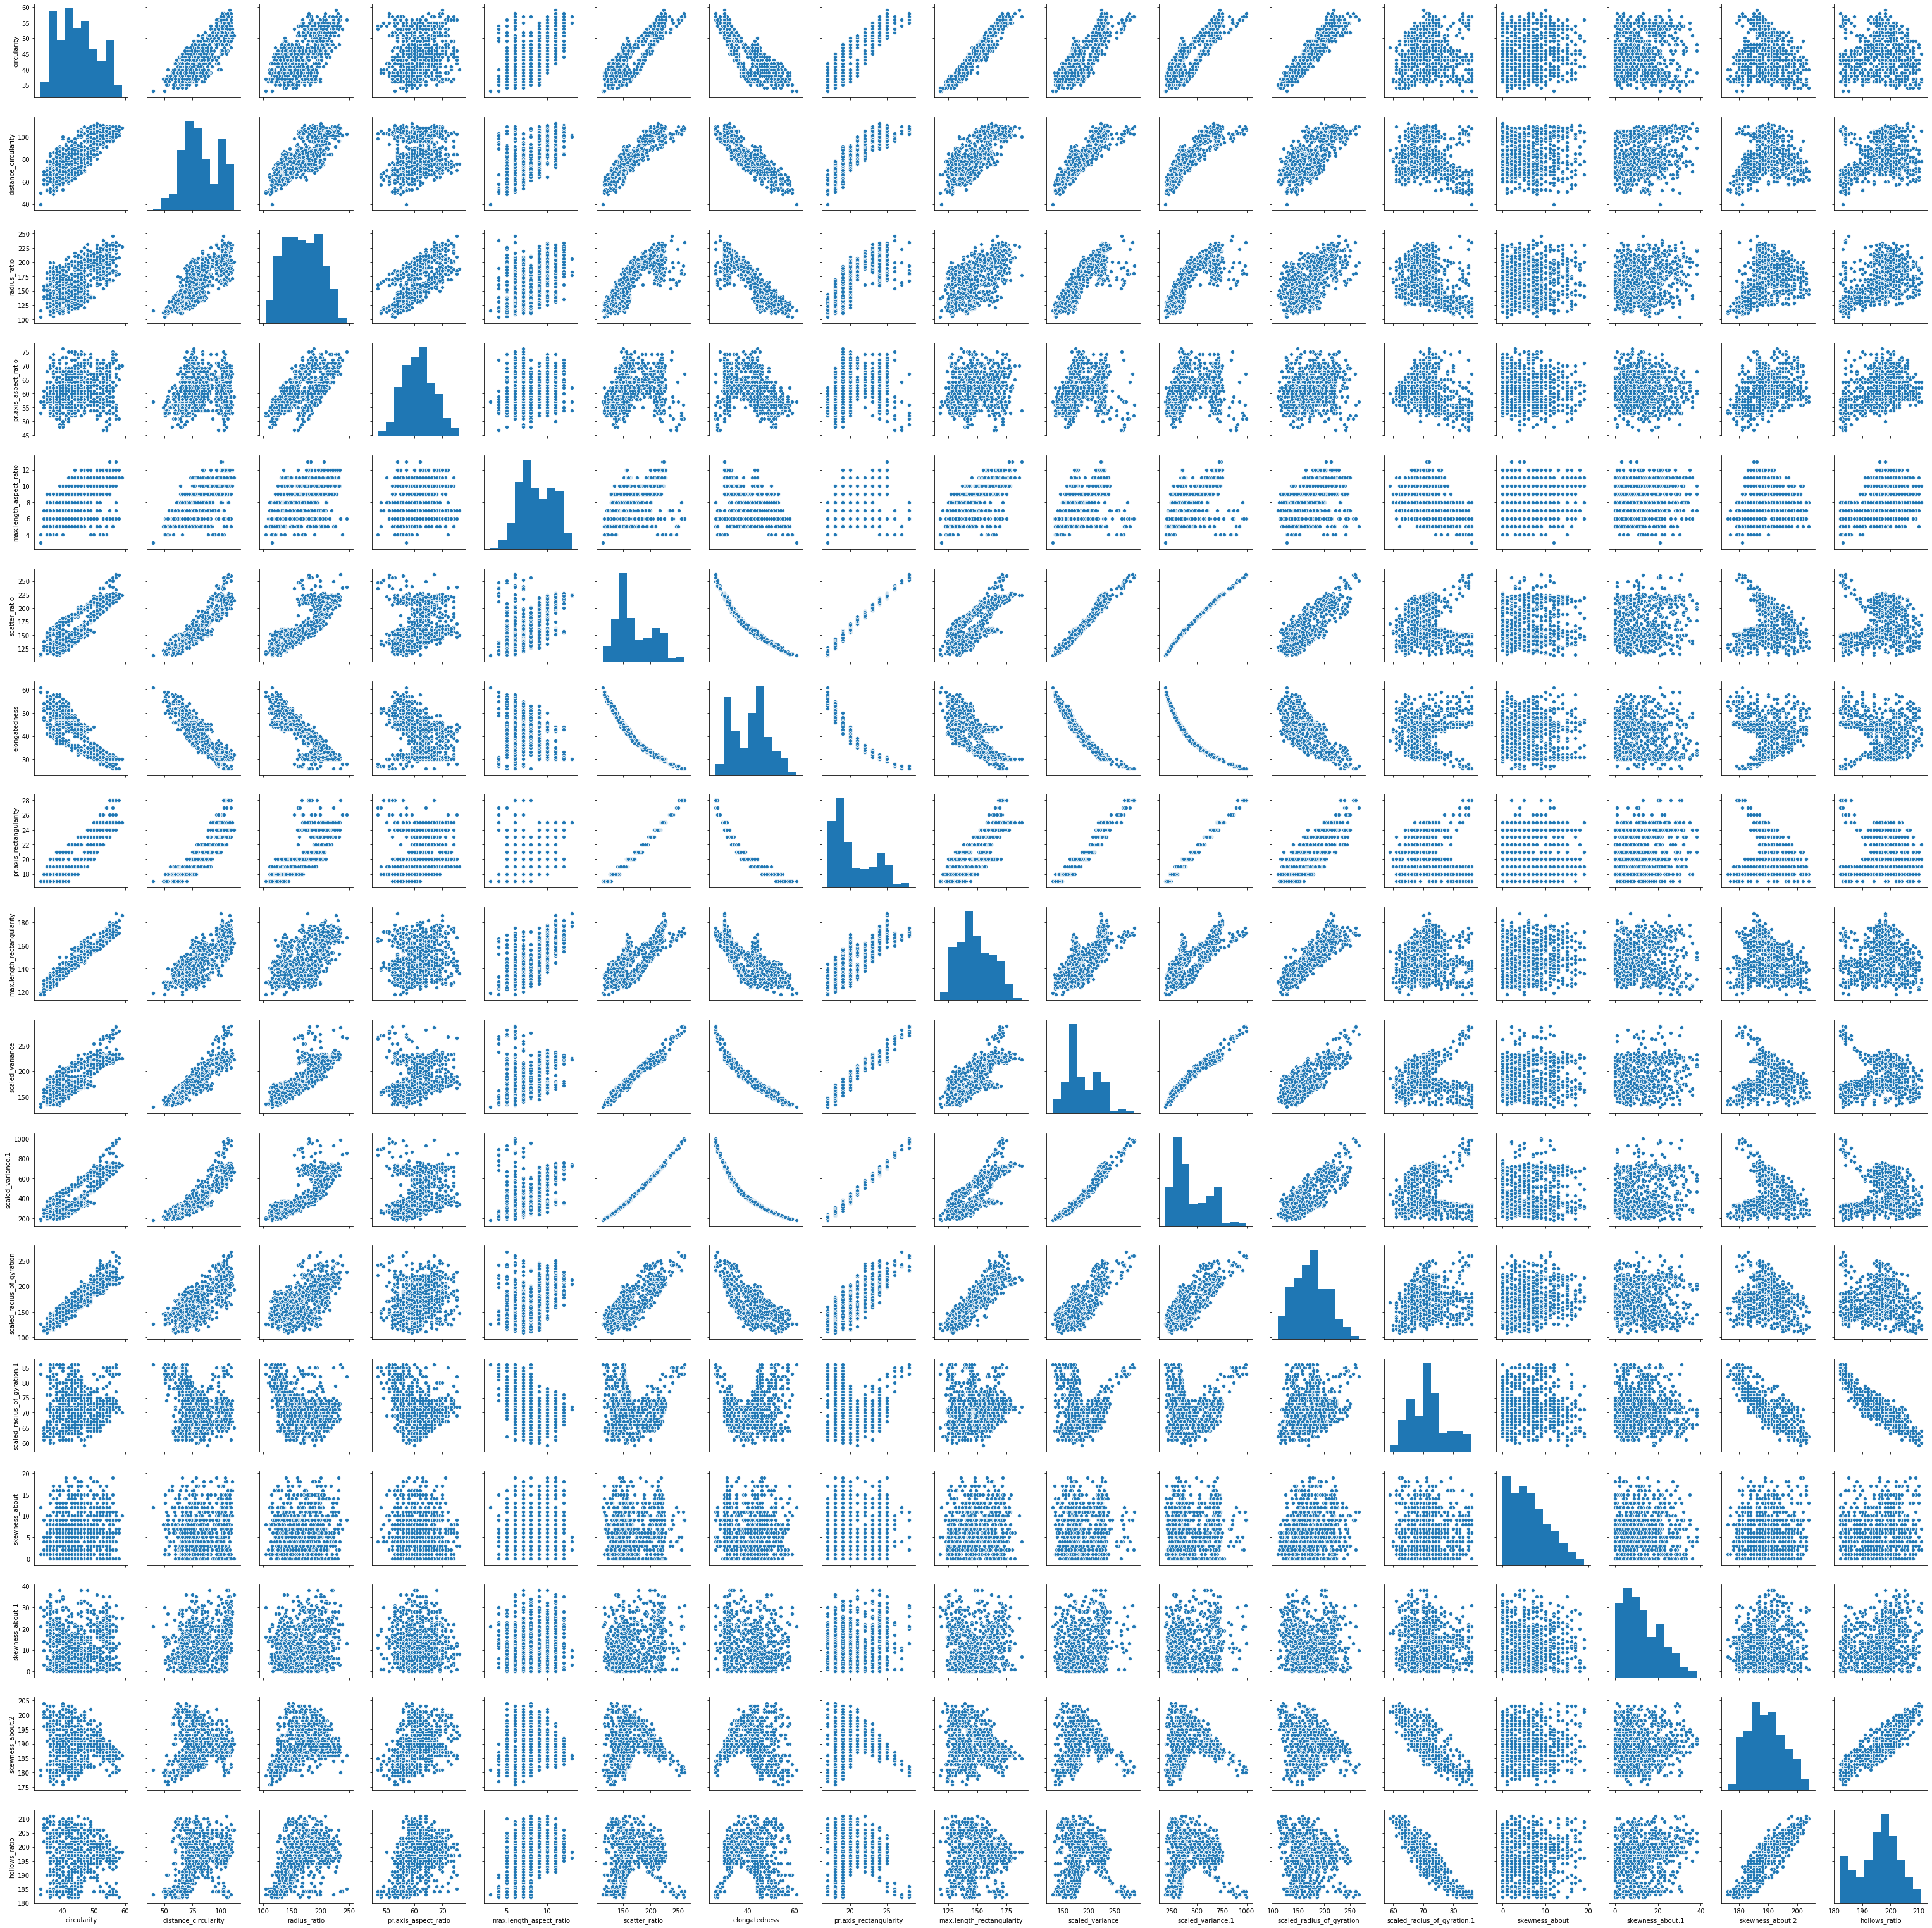

In [11]:
sns.pairplot(vehicle_df)

# The pair plot shows that many variables are correlated

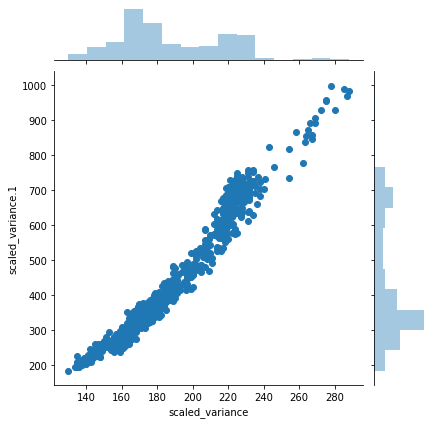

In [93]:
sns.jointplot(x=vehicle_df['scaled_variance'],y=vehicle_df['scaled_variance.1'])

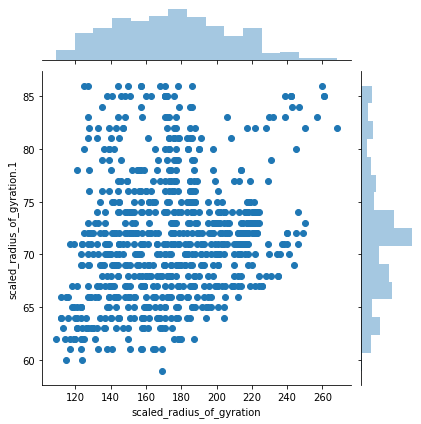

In [94]:
sns.jointplot(x=vehicle_df['scaled_radius_of_gyration'],y=vehicle_df['scaled_radius_of_gyration.1'])

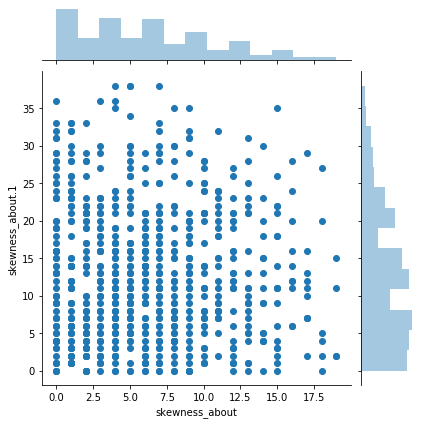

In [95]:
sns.jointplot(x=vehicle_df['skewness_about'],y=vehicle_df['skewness_about.1'])

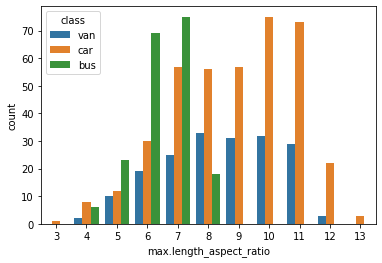

In [96]:
sns.countplot(x='max.length_aspect_ratio',data=vehicle_df,hue='class')

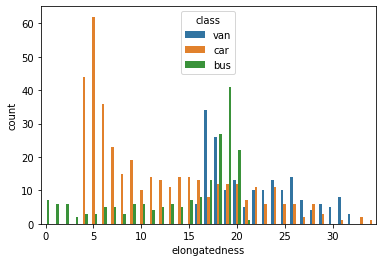

In [55]:
import matplotlib.ticker as ticker
ax=sns.countplot(x='elongatedness',data=vehicle_df,hue='class')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

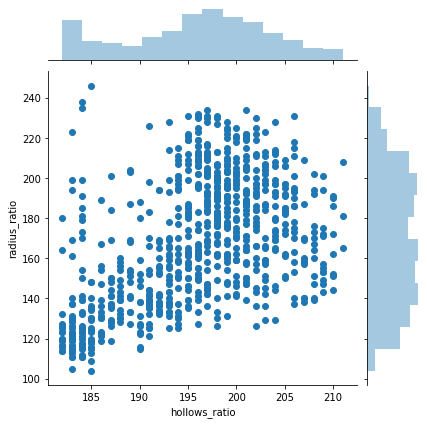

In [56]:
sns.jointplot(x=vehicle_df['hollows_ratio'],y=vehicle_df['radius_ratio'])

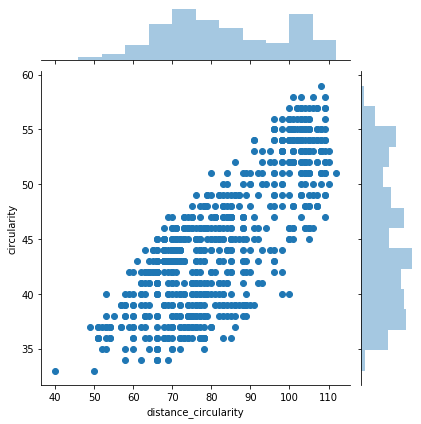

In [58]:
sns.jointplot(x=vehicle_df['distance_circularity'],y=vehicle_df['circularity'])

In [97]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

X=vehicle_df.drop(['class'],axis=1)
y=vehicle_df['class']

scaled_X=X.apply(zscore)
scaled_X.head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.512254              0.039325      0.296434              1.887175   
1    -0.627194              0.104081     -0.880573             -0.767204   
2     0.837811              1.528708      1.282575              0.825423   
3    -0.627194             -0.025431     -0.307975              0.294547   
6    -0.301637             -0.608233      0.137379              0.648465   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                  0.89964      -0.212996       0.151403   
1                  0.40968      -0.609369       0.540797   
2                  0.89964       1.159065      -1.146577   
3                  0.40968      -0.761820       0.670595   
6                 -1.06020      -0.487408       0.151403   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0               -0.230411                   0.758614        -0.401752   
1               -0.622415                  -0.346261        -0.600666   
2                0.945601                   0.689559         1.156410   
3               -0.622415                  -0.346261        -0.932190   
6               -0.622415                  -0.346261        -0.401752   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.353826                   0.301782                    -0.299508   
1          -0.635858                  -0.502086                     0.037466   
2           1.119649                   1.414831                     0.205953   
3          -0.756729                  -1.460544                    -1.478919   
6          -0.457429                  -0.069234                    -0.973457   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0       -0.045194          0.372290         -0.358810       0.148689  
1        0.602395          0.145525         -0.027170       0.427231  
2        1.681709         -0.421388         -0.192990       0.009418  
3       -0.045194         -0.308006          1.631033       1.541399  
6        1.465846         -1.328449          1.796853       1.123586

In [98]:
pca_model=PCA()
pca_model.fit(scaled_X)

print(pca_model.explained_variance_ratio_)

[5.35542358e-01 1.94881480e-01 7.07757944e-02 6.75475540e-02
 5.20572051e-02 3.65072581e-02 1.90177031e-02 8.01065624e-03
 4.64226459e-03 3.46861015e-03 2.35847206e-03 1.95996511e-03
 1.23514055e-03 9.12743185e-04 7.06359664e-04 3.56008194e-04
 2.04277457e-05]


Text(0, 0.5, 'Explained Variance')

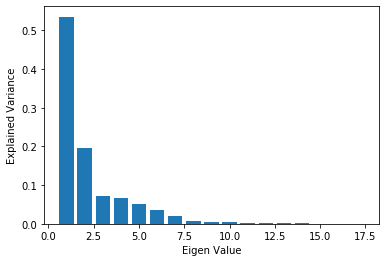

In [99]:
plt.bar(list(range(1,scaled_X.shape[1]+1)),pca_model.explained_variance_ratio_)
plt.xlabel('Eigen Value')
plt.ylabel('Explained Variance')

# As seen below, the first seven components explain most variance

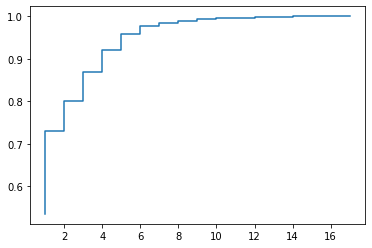

In [100]:
plt.step(list(range(1,scaled_X.shape[1]+1)),np.cumsum(pca_model.explained_variance_ratio_))

# As seen below the elbow can be seen at the 6th variable

In [101]:
np.cumsum(pca_model.explained_variance_ratio_)

# We get 95% variation explanation at the 6th varaible

array([0.53554236, 0.73042384, 0.80119963, 0.86874719, 0.92080439,
       0.95731165, 0.97632935, 0.98434001, 0.98898227, 0.99245088,
       0.99480936, 0.99676932, 0.99800446, 0.9989172 , 0.99962356,
       0.99997957, 1.        ])

In [111]:
# Perform PCA with 7 components

newPCA=PCA(n_components=7)
newPCA.fit(scaled_X)

pca_df=newPCA.transform(scaled_X)

pca_df.shape

(769, 7)

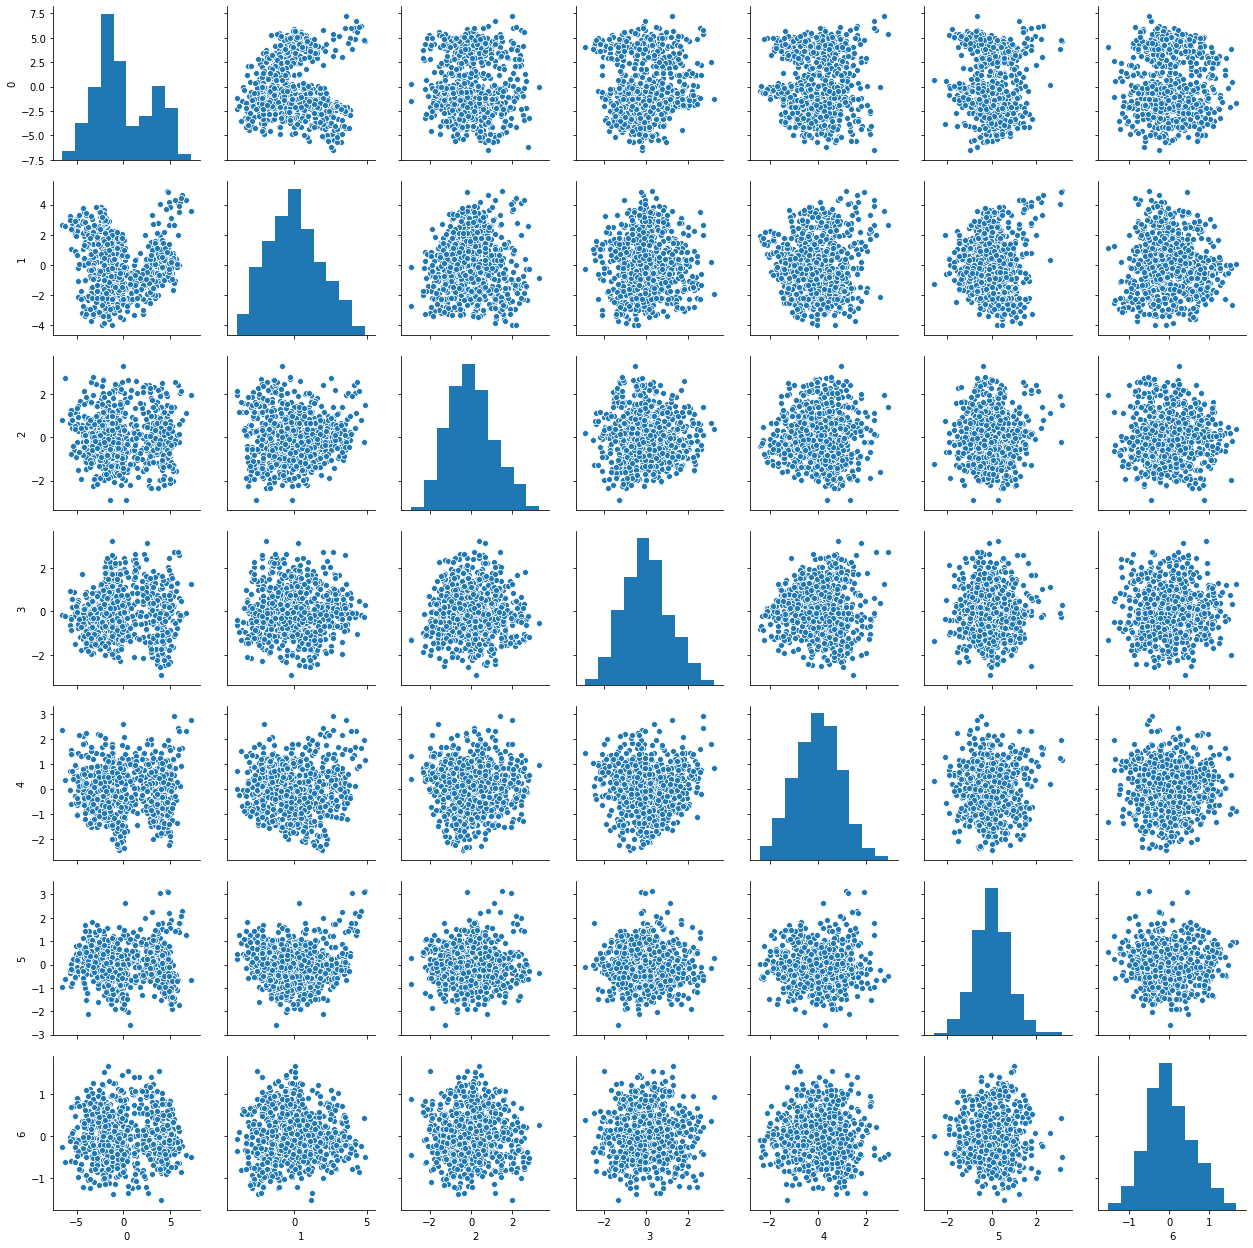

In [113]:
sns.pairplot(pd.DataFrame(pca_df))

# The generated principal components are independent from each other

In [107]:
# SVC on Original dataset

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

svm_model=svm.SVC()

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
svm_model.fit(X_train,y_train)
y_predicted= svm_model.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))

[[  0  56   0]
 [  0 121   0]
 [  0  53   1]]
0.5281385281385281


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
# SVC with Principal Components

svm_model=svm.SVC()
X_train, X_test, y_train, y_test =train_test_split(pca_df,y,test_size=0.30,random_state=1)
svm_model.fit(X_train,y_train)
y_predicted= svm_model.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))

[[ 50   4   2]
 [  1 117   3]
 [  0  11  43]]
0.9090909090909091


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# It is evident from the above that the analysis done on the original data set gives only 52% accuracy
# While the analysis done using the principal components, the accuracy has boosted to 90%